<a href="https://colab.research.google.com/github/Sanjanaashivanand/LearningPytorch/blob/main/3_Linear_Regression_in_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
weight = 0.7
bias = 0.3

#Create the data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

#Estimate weight and bias, assume we are just given X and y

In [3]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
#Splitting the data
X_train, y_train = X[:int(0.8 * len(X))], y[:int(0.8 * len(X))]
X_test, y_test = X[int(0.8 * len(X)):], y[int(0.8 * len(X)):]

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size":14})

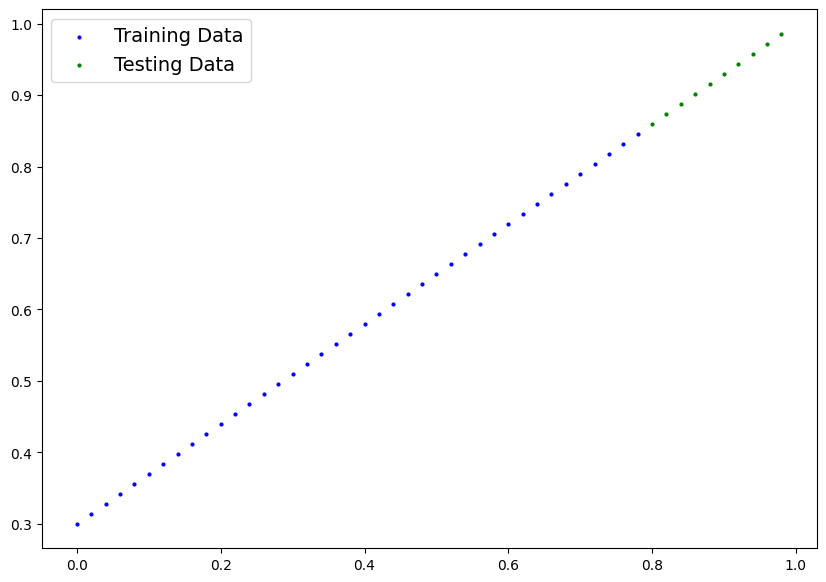

In [6]:
plot_predictions()

In [7]:
#Linear regression model

#torch.nn conatins all the building blocks of neural networks
#nn.Paremeters -> what our model should learn
#torch.nn.Module -> The base class, i.e subclasses that we can override

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias


In [8]:
#Check the model
torch.manual_seed(42)
model0 = LinearRegressionModel()

list(model0.parameters()), model0.state_dict()

([Parameter containing:
  tensor([0.3367], requires_grad=True),
  Parameter containing:
  tensor([0.1288], requires_grad=True)],
 OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]))

In [9]:
#Disables the gradient -> read more, torch.no
with torch.inference_mode():
  y_pred = model0(X_test)

y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [10]:
y_pred = model0(X_test)
y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [11]:
#Loss function
loss_fn = nn.L1Loss()

#Optimizer
optimizer = torch.optim.SGD(params= model0.parameters(),
                            lr = 0.1)

#Training
0. Loop through data
1. Forward pass
2. Calculate the loss
3. Gradient
4. Loss Backwards
5. Optimizer

In [12]:
#Training

epochs = 100
for epoch in range(epochs):
  model0.train()
  y_pred = model0(X_train)
  loss = loss_fn(y_pred, y_train)
  print("Loss", loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #Testing
  model0.eval()

  with torch.inference_mode():
    test_pred = model0(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch%10==0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")



Loss tensor(0.3129, grad_fn=<MeanBackward0>)
Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.35982614755630493
Loss tensor(0.1977, grad_fn=<MeanBackward0>)
Loss tensor(0.0868, grad_fn=<MeanBackward0>)
Loss tensor(0.0496, grad_fn=<MeanBackward0>)
Loss tensor(0.0461, grad_fn=<MeanBackward0>)
Loss tensor(0.0426, grad_fn=<MeanBackward0>)
Loss tensor(0.0392, grad_fn=<MeanBackward0>)
Loss tensor(0.0357, grad_fn=<MeanBackward0>)
Loss tensor(0.0323, grad_fn=<MeanBackward0>)
Loss tensor(0.0289, grad_fn=<MeanBackward0>)
Loss tensor(0.0254, grad_fn=<MeanBackward0>)
Epoch: 10 | Loss: 0.025432366877794266 | Test Loss: 0.05427704378962517
Loss tensor(0.0220, grad_fn=<MeanBackward0>)
Loss tensor(0.0191, grad_fn=<MeanBackward0>)
Loss tensor(0.0188, grad_fn=<MeanBackward0>)
Loss tensor(0.0398, grad_fn=<MeanBackward0>)
Loss tensor(0.0754, grad_fn=<MeanBackward0>)
Loss tensor(0.0398, grad_fn=<MeanBackward0>)
Loss tensor(0.0754, grad_fn=<MeanBackward0>)
Loss tensor(0.0398, grad_fn=<MeanBackward0>)
Los

In [13]:
with torch.inference_mode():
  y_preds_new = model0(X_test)

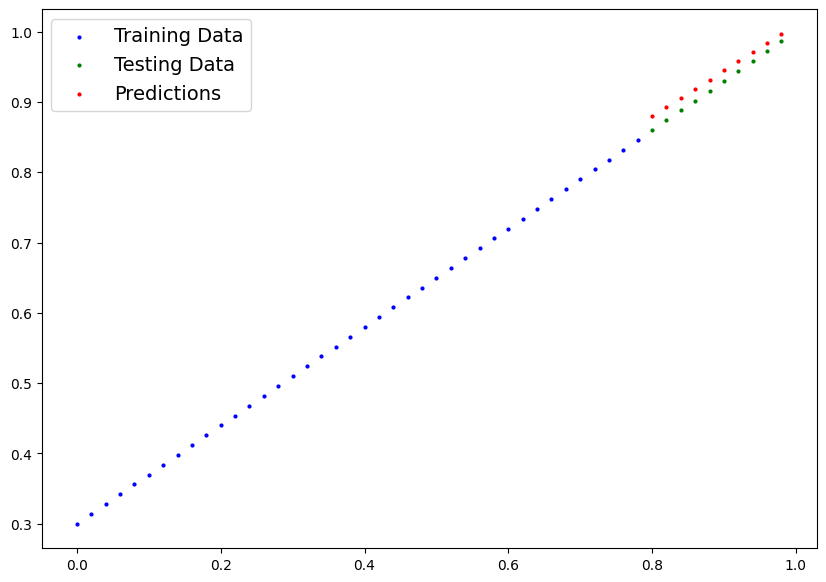

In [14]:
plot_predictions(predictions=y_preds_new)

In [15]:
model0.state_dict()

OrderedDict([('weights', tensor([0.6512])), ('bias', tensor([0.3588]))])